In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('./min_max.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop('production', axis=1), df['production'], test_size=0.2, random_state=42) 

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential


input_shape = (X_train.shape[1],)
print(f'input shape: {input_shape}')

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32) 

with open('output.txt', 'w') as f:
    print(history.history, file=f)


Epoch 1/50
22/22 [==============================] - 0s 4ms/step - loss: 0.1448 - mae: 0.3691 - val_loss: 0.1005 - val_mae: 0.3100
Epoch 2/50
22/22 [==============================] - 0s 1ms/step - loss: 0.0621 - mae: 0.2337 - val_loss: 0.0393 - val_mae: 0.1782
Epoch 3/50
22/22 [==============================] - 0s 1ms/step - loss: 0.0229 - mae: 0.1233 - val_loss: 0.0231 - val_mae: 0.1001
Epoch 4/50
22/22 [==============================] - 0s 1ms/step - loss: 0.0152 - mae: 0.0809 - val_loss: 0.0205 - val_mae: 0.0796
Epoch 5/50
22/22 [==============================] - 0s 1ms/step - loss: 0.0136 - mae: 0.0696 - val_loss: 0.0188 - val_mae: 0.0727
Epoch 6/50
22/22 [==============================] - 0s 1ms/step - loss: 0.0125 - mae: 0.0654 - val_loss: 0.0169 - val_mae: 0.0697
Epoch 7/50
22/22 [==============================] - 0s 1ms/step - loss: 0.0115 - mae: 0.0632 - val_loss: 0.0153 - val_mae: 0.0671
Epoch 8/50
22/22 [==============================] - 0s 1ms/step - loss: 0.0106 - mae: 0.06

In [23]:
y_pred_scaled = model.predict(X_test)



In [12]:
original_data = pd.read_csv('./final_data.csv')
production = original_data['production'].values
min_value = production.min()
max_value = production.max()
# Revert the scaling of the predictions
y_pred = (y_pred_scaled * (max_value - min_value)) + min_value
y_test_original = (y_test * (max_value - min_value)) + min_value
print(y_pred)

[[ 2831102.10835934]
 [ 1969993.89088154]
 [  778133.95772874]
 [15290590.70849419]
 [  873661.05772555]
 [18616306.57196045]
 [  210285.58099642]
 [  552990.94873667]
 [  206519.25225556]
 [  386352.34442353]
 [  356463.44118565]
 [11293782.49740601]
 [  397481.44555092]
 [  201411.35311872]
 [  347209.4220221 ]
 [ 4422687.36040592]
 [19697198.64463806]
 [  310649.46948364]
 [  440356.60330206]
 [  728294.69297826]
 [12688172.88422585]
 [  208714.83027935]
 [ 2375514.03164864]
 [  335097.48570621]
 [  398776.12162381]
 [  259062.67751008]
 [17798630.7528019 ]
 [  908586.50945127]
 [ 1617826.43428445]
 [11632674.36933517]
 [  840088.28629553]
 [  260720.05271539]
 [  455314.78319317]
 [  488507.63605535]
 [  695685.99173427]
 [  901467.22751856]
 [  212085.80296487]
 [  312125.04963577]
 [  406527.34047174]
 [ 7439759.37223434]
 [ 7765274.85215664]
 [ 8156879.7980547 ]
 [ 2936235.28951406]
 [  942474.06743467]
 [ 2140443.68174672]
 [ 2985558.15303326]
 [  412276.77722275]
 [  629441.82

In [24]:
print(y_test_original)

355     4042000.0
56      3800000.0
478     1372000.0
701    31080000.0
724      750000.0
          ...    
820    15600000.0
570      423000.0
889      718000.0
880     9380000.0
737      664000.0
Name: production, Length: 218, dtype: float64


In [13]:
print(y_test)

355    0.103206
56     0.097009
478    0.034829
701    0.795636
724    0.018900
         ...   
820    0.399201
570    0.010526
889    0.018080
880    0.239910
737    0.016697
Name: production, Length: 218, dtype: float64


In [30]:
import numpy as np
differences = np.abs(y_pred.reshape(-1) - y_test_original)

print(differences)

num_correct = np.sum(differences <= 1020500)

percentage_correct = num_correct / len(y_test) * 100

print(f"Percentage of predictions within 2205 pounds of actual values: {percentage_correct}%")

355    4.042000e+06
56     3.800000e+06
478    1.372000e+06
701    3.108000e+07
724    7.500000e+05
           ...     
820    1.560000e+07
570    4.229999e+05
889    7.179999e+05
880    9.380000e+06
737    6.640000e+05
Name: production, Length: 218, dtype: float64


In [21]:
from sklearn.metrics import mean_absolute_error
import numpy as np

differences = np.abs(y_pred.reshape(-1) - y_test_original)

print(differences)

num_correct = np.sum(differences <= 10205)

percentage_correct = num_correct / len(y_test) * 100

print(f"Percentage of predictions within 2205 pounds of actual values: {percentage_correct}%")

355    4.042000e+06
56     3.800000e+06
478    1.372000e+06
701    3.108000e+07
724    7.500000e+05
           ...     
820    1.560000e+07
570    4.229999e+05
889    7.179999e+05
880    9.380000e+06
737    6.640000e+05
Name: production, Length: 218, dtype: float64


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)

print(len(y_pred))
print(len(y_test))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

y_pred = y_pred.reshape(y_test.shape)
SS_res = np.sum(np.square(y_test - y_pred))
SS_tot = np.sum(np.square(y_test - np.mean(y_test)))
r_squared = 1 - (SS_res / SS_tot)

print("R-squared: {:.4f}".format(r_squared))
print("Mean squared error (MSE): {:.4f}".format(mse))
print("Mean absolute error (MAE): {:.4f}".format(mae))

218
218
R-squared: 0.6683
Mean squared error (MSE): 0.0090
Mean absolute error (MAE): 0.0496


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 0.008980609685662094
RMSE: 0.09476607877116207
MAE: 0.0495963910181876
R2 Score: 0.6682576615354534


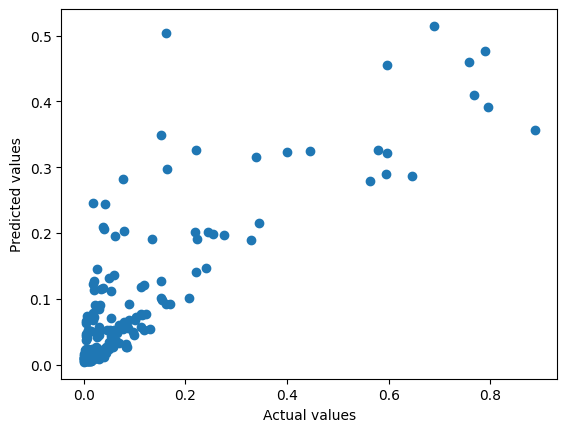

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

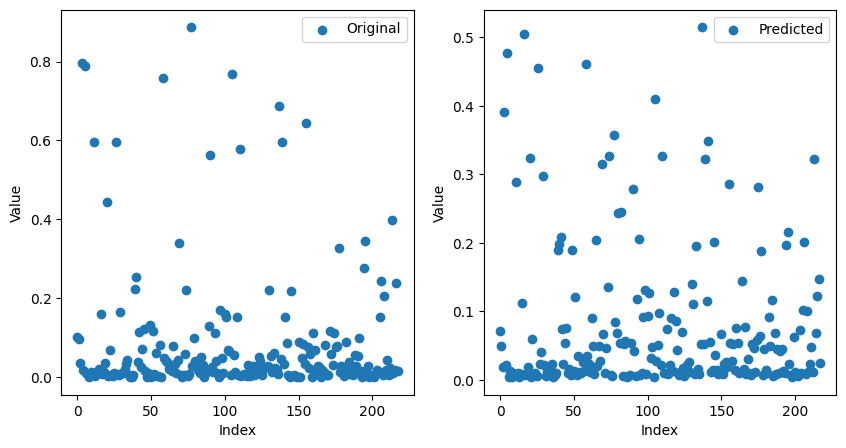

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(range(len(y_test)), y_test, label='Original')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.legend()

ax2.scatter(range(len(y_pred)), y_pred, label='Predicted')
ax2.set_xlabel('Index')
ax2.set_ylabel('Value')
ax2.legend()

plt.show()